In [1]:
pip install tensorflow opencv-python matplotlib


Note: you may need to restart the kernel to use updated packages.


In [6]:
import os

import shutil

train_dataset_path = '/Users/gizem/Downloads/SkyFusion/train' 
test_dataset_path = '/Users/gizem/Downloads/SkyFusion/test'

os.makedirs('dataset/train', exist_ok=True)

os.makedirs('dataset/test', exist_ok=True)

train_images = os.listdir(train_dataset_path) 
for img in train_images:
    src = os.path.join(train_dataset_path, img) 
    dst = os.path.join('dataset/train', img) 
    shutil.move(src, dst) 

test_images = os.listdir(test_dataset_path)
for img in test_images: 
    src = os.path.join(test_dataset_path, img) 
    dst = os.path.join('dataset/test', img) 
    shutil.move(src, dst)

print(f"There are {len(train_images)} images in the training set and {len(test_images)} images in the test set.")

There are 2095 images in the training set and 450 images in the test set.


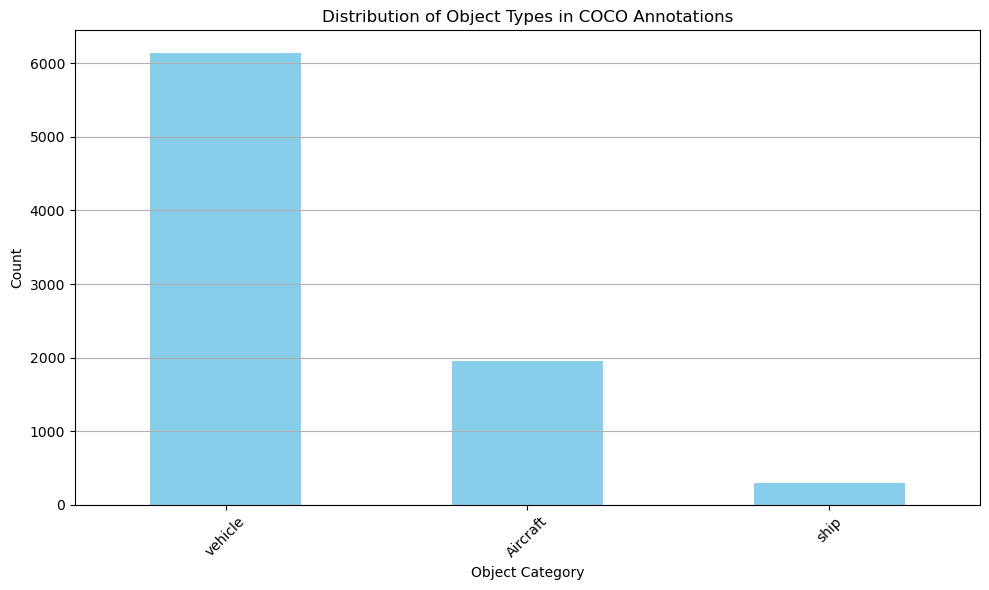

In [4]:
import json
import pandas as pd
import matplotlib.pyplot as plt

with open('/Users/gizem/Downloads/SkyFusion/valid/_annotations.coco.json', 'r') as f:
    annotations = json.load(f)


categories = {category['id']: category['name'] for category in annotations['categories']}
annotations_data = annotations['annotations']


object_types = [categories[annotation['category_id']] for annotation in annotations_data]
object_counts = pd.Series(object_types).value_counts()


plt.figure(figsize=(10, 6))
object_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Object Types in COCO Annotations')
plt.xlabel('Object Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [12]:
import cv2
import os
import json
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
IMG_HEIGHT, IMG_WIDTH = 224, 224
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
def preprocess_images(image_dir):
    images = []
    for img_name in os.listdir(image_dir):
        img_path = os.path.join(image_dir, img_name)
        img = cv2.imread(img_path)
        if img is not None:  # Check if image was read successfully
            img = cv2.resize(img, (IMG_HEIGHT, IMG_WIDTH))
            img = img / 255.0
            images.append(img)
        else:
            print(f"Warning: {img_name} could not be read and was skipped.")
    return images
def load_annotations(json_path):
    with open(json_path, 'r') as file:
        annotations = json.load(file)
    return annotations
dataset_paths = {
    "train": "/Users/gizem/Downloads/SkyFusion/train",
    "test": "/Users/gizem/Downloads/SkyFusion/test",
    "valid": "/Users/gizem/Downloads/SkyFusion/valid"
}
for split, path in dataset_paths.items():
    print(f"\nProcessing {split} set:")   
    image_dir = os.path.join(path)
    images = preprocess_images(image_dir)    
    if images:
        images = np.array(images)
        data_generator = datagen.flow(images, batch_size=32)
        augmented_images = next(data_generator)
        print(f"{split.capitalize()} set: {len(images)} images loaded and augmented.")
    annotation_path = os.path.join(path, '_annotations.coco.json')
    annotations = load_annotations(annotation_path)
    print(f"{split.capitalize()} set: Annotations loaded with {len(annotations['annotations'])} entries.")



Processing train set:
Train set: 2094 images loaded and augmented.
Train set: Annotations loaded with 43575 entries.

Processing test set:
Test set: 449 images loaded and augmented.
Test set: Annotations loaded with 11751 entries.

Processing valid set:
Valid set: 449 images loaded and augmented.
Valid set: Annotations loaded with 8387 entries.


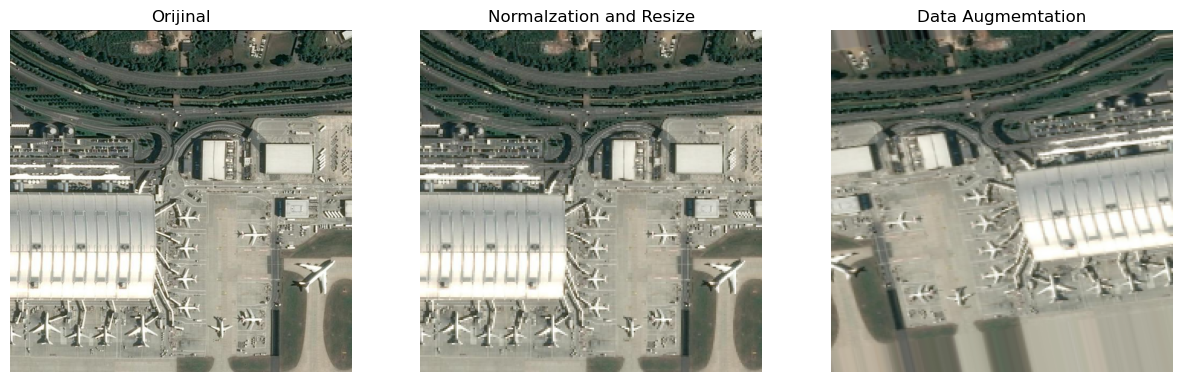

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_HEIGHT, IMG_WIDTH = 224, 224
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

def process_single_image(image_path):
   
    original_img = cv2.imread(image_path)
    if original_img is None:
        print("failed.")
        return
    original_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)  
    
    resized_img = cv2.resize(original_img, (IMG_WIDTH, IMG_HEIGHT))
    normalized_img = resized_img / 255.0  
    
    normalized_img_expanded = np.expand_dims(normalized_img, 0)  
    augmented_img_iter = datagen.flow(normalized_img_expanded, batch_size=1)
    augmented_img = next(augmented_img_iter)[0]  

    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    axes[0].imshow(original_img)
    axes[0].set_title("Orijinal")
    axes[1].imshow(normalized_img)
    axes[1].set_title("Normalzation and Resize")
    axes[2].imshow(augmented_img)
    axes[2].set_title("Data Augmemtation")
    for ax in axes:
        ax.axis("off")
    plt.show()

image_path = "/Users/gizem/Downloads/SkyFusion/test/78099b50-f2b6-4319-b462-f33df2966c45_0_1060_jpg.rf.9404532349f8bdcffa2831143133c171.jpg"
process_single_image(image_path)


In [9]:
pip install --upgrade tensorflow tensorflow-hub


Note: you may need to restart the kernel to use updated packages.


In [10]:
model_url = "https://tfhub.dev/tensorflow/yolov4/1"


In [12]:
model_url = "https://tfhub.dev/captain-moha/yolov4/1"


In [13]:
pip show tensorflow tensorflow-hub


Name: tensorflow
Version: 2.16.2
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /Users/gizem/anaconda3/lib/python3.11/site-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, ml-dtypes, numpy, opt-einsum, packaging, protobuf, requests, setuptools, six, tensorboard, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: tf_keras
---
Name: tensorflow-hub
Version: 0.16.1
Summary: TensorFlow Hub is a library to foster the publication, discovery, and consumption of reusable parts of machine learning models.
Home-page: https://github.com/tensorflow/hub
Author: Google LLC
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /Users/gizem/anaconda3/lib/python3.11/site-packages
Requires: numpy, protobuf, tf-keras
Required-by: 
Note: you may need to r

In [ ]:
import tensorflow_hub as hub  

model_url = "https://tfhub.dev/google/faster_rcnn/openimages_v4/inference/1"
model = hub.load(model_url)
print("Model loaded successfully!")


In [ ]:
pip install tensorflow-cpu==2.16.2


  Obtaining dependency information for tensorflow-cpu==2.16.2 from https://files.pythonhosted.org/packages/eb/e6/3f6734c119d5adbcd854b19e4f385d6a756b07fcaa51a3b5e2bebfbd017a/tensorflow_cpu-2.16.2-cp311-cp311-macosx_10_15_x86_64.whl.metadata
  Using cached tensorflow_cpu-2.16.2-cp311-cp311-macosx_10_15_x86_64.whl.metadata (4.1 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.6/259.6 MB 515.4 kB/s eta 0:00:0000:0100:11


In [1]:
pip install tensorflow-cpu==2.15.0 keras==2.15.0


  Obtaining dependency information for tensorflow-cpu==2.15.0 from https://files.pythonhosted.org/packages/e5/d0/5b1288c11011a63e0027a8e8524928dc5ae9e0ad3134ec619937c019d0e7/tensorflow_cpu-2.15.0-cp311-cp311-macosx_10_15_x86_64.whl.metadata
  Using cached tensorflow_cpu-2.15.0-cp311-cp311-macosx_10_15_x86_64.whl.metadata (4.2 kB)
  Obtaining dependency information for keras==2.15.0 from https://files.pythonhosted.org/packages/fc/a7/0d4490de967a67f68a538cc9cdb259bff971c4b5787f7765dc7c8f118f71/keras-2.15.0-py3-none-any.whl.metadata
  Using cached keras-2.15.0-py3-none-any.whl.metadata (2.4 kB)
  Obtaining dependency information for ml-dtypes~=0.2.0 from https://files.pythonhosted.org/packages/15/da/43bee505963da0c730ee50e951c604bfdb90d4cccc9c0044c946b10e68a7/ml_dtypes-0.2.0-cp311-cp311-macosx_10_9_universal2.whl.metadata
  Using cached ml_dtypes-0.2.0-cp311-cp311-macosx_10_9_universal2.whl.metadata (20 kB)
  Obtaining dependency information for tensorboard<2.16,>=2.15 from https://files.

In [1]:
import tensorflow as tf
print(tf.__version__)


2024-10-27 19:46:56.732774: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


2.15.0


In [3]:
pip install tensorflow opencv-python-headless


  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/6d/69/9999c2d9e8a3b08dfcfc7e9259a05fb1da5f700936091d2eb4a7985c2776/tensorflow-2.16.2-cp311-cp311-macosx_10_15_x86_64.whl.metadata
  Using cached tensorflow-2.16.2-cp311-cp311-macosx_10_15_x86_64.whl.metadata (4.1 kB)
  Obtaining dependency information for ml-dtypes~=0.3.1 from https://files.pythonhosted.org/packages/6e/a4/6aabb78f1569550fd77c74d2c1d008b502c8ce72776bd88b14ea6c182c9e/ml_dtypes-0.3.2-cp311-cp311-macosx_10_9_universal2.whl.metadata
  Obtaining dependency information for tensorboard<2.17,>=2.16 from https://files.pythonhosted.org/packages/3a/d0/b97889ffa769e2d1fdebb632084d5e8b53fc299d43a537acee7ec0c021a3/tensorboard-2.16.2-py3-none-any.whl.metadata
  Obtaining dependency information for keras>=3.0.0 from https://files.pythonhosted.org/packages/c2/88/eef50051a772dcb4433d1f3e4c1d6576ba450fe83e89d028d7e8b85a2122/keras-3.6.0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import cv2
import numpy as np

config_path = '/Users/gizem/Downloads/yolov3.cfg'
weights_path = '/Users/gizem/Downloads/yolov3.weights'
names_path = '/Users/gizem/Desktop/coco.names.txt'

net = cv2.dnn.readNet(weights_path, config_path)

with open(names_path, 'r') as f:
    class_names = [line.strip() for line in f.readlines()]

def detect_objects(image):

    blob = cv2.dnn.blobFromImage(image, 1/255.0, (416, 416), swapRB=True, crop=False)
    net.setInput(blob)

    layer_names = net.getLayerNames()
    output_layers_indices = net.getUnconnectedOutLayers()
    
    output_layers = [layer_names[i - 1] for i in output_layers_indices.flatten()]

    detections = net.forward(output_layers)

    boxes, scores, classes = [], [], []
    h, w = image.shape[:2]

    for output in detections:
        for detection in output:
            scores_all = detection[5:]
            class_id = np.argmax(scores_all)
            confidence = scores_all[class_id]

            if confidence > 0.5:  
                box = detection[0:4] * np.array([w, h, w, h])
                center_x, center_y, width, height = box.astype("int")

                x = int(center_x - (width / 2))
                y = int(center_y - (height / 2))

                boxes.append([x, y, int(width), int(height)])
                scores.append(float(confidence))
                classes.append(class_id)

    return boxes, scores, classes

image_path = "/Users/gizem/Downloads/SkyFusion/test/78099b50-f2b6-4319-b462-f33df2966c45_0_1060_jpg.rf.9404532349f8bdcffa2831143133c171.jpg"
image = cv2.imread(image_path)

if image is None:
    print("Check path")
else:
    boxes, scores, classes = detect_objects(image)

    for box, score, class_id in zip(boxes, scores, classes):
        x, y, w, h = box
        cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 2)
        cv2.putText(image, f'{class_names[class_id]}: {score:.2f}', (x, y - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

    cv2.imshow('Detected Objects', image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()


In [ ]:
import cv2
import numpy as np

config_path = "/Users/gizem/Downloads/yolov3.cfg"  
weights_path = "/Users/gizem/Downloads/yolov3.weights"  
names_path = "/Users/gizem/Desktop/coco.names.txt"  

net = cv2.dnn.readNet(weights_path, config_path)

with open(names_path, 'r') as f:
    class_names = [line.strip() for line in f.readlines()]

image_path = "/Users/gizem/Downloads/SkyFusion/test/78099b50-f2b6-4319-b462-f33df2966c45_0_1060_jpg.rf.9404532349f8bdcffa2831143133c171.jpg"
image = cv2.imread(image_path)

blob = cv2.dnn.blobFromImage(image, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
net.setInput(blob)

layer_names = net.getLayerNames()
output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]

detections = net.forward(output_layers)

boxes = []
confidences = []
class_ids = []
height, width, _ = image.shape

for output in detections:
    for detection in output:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]

        if confidence > 0.5:
      
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)

       
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)

            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

for i in range(len(boxes)):
    if i in indexes:
        x, y, w, h = boxes[i]
        label = str(class_names[class_ids[i]])
        confidence = confidences[i]
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv2.putText(image, f"{label} {confidence:.2f}", (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

output_path = "/Users/gizem/Downloads/processed_image.jpg"
cv2.imwrite(output_path, image)

cv2.imshow("Image", image)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [4]:
pip install tensorflow opencv-python


Note: you may need to restart the kernel to use updated packages.


In [ ]:
import tensorflow as tf
import cv2
import numpy as np

cfg_path = "/Users/gizem/Downloads/yolov3.cfg"
weights_path = "/Users/gizem/Downloads/yolov3.weights"
names_path = "/Users/gizem/Desktop/coco.names.txt"
image_path = "/Users/gizem/Downloads/SkyFusion/test/78099b50-f2b6-4319-b462-f33df2966c45_0_1060_jpg.rf.9404532349f8bdcffa2831143133c171.jpg"

net = cv2.dnn.readNetFromDarknet(cfg_path, weights_path)
net.setPreferableBackend(cv2.dnn.DNN_BACKEND_OPENCV)
net.setPreferableTarget(cv2.dnn.DNN_TARGET_CPU)

layer_names = net.getLayerNames()
output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]

image = cv2.imread(image_path)
height, width = image.shape[:2]

blob = cv2.dnn.blobFromImage(image, 1 / 255.0, (416, 416), swapRB=True, crop=False)
net.setInput(blob)
outputs = net.forward(output_layers)

with open(names_path, "r") as f:
    class_names = [line.strip() for line in f.readlines()]

boxes, confidences, class_ids = [], [], []
for output in outputs:
    for detection in output:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.3:  # Eşik değeri
            box = detection[:4] * np.array([width, height, width, height])
            (center_x, center_y, w, h) = box.astype("int")
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)
            boxes.append([x, y, int(w), int(h)])
            confidences.append(float(confidence))
            class_ids.append(class_id)

indices = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
for i in indices:
    i = i[0]
    box = boxes[i]
    x, y, w, h = box
    label = f"{class_names[class_ids[i]]}: {confidences[i]:.2f}"
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
    cv2.putText(image, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

cv2.imshow("Detected Objects", image)
cv2.waitKey(0)
cv2.destroyAllWindows()


2024-10-27 22:06:42.742322: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
names_path = "/Users/gizem/Desktop/coco.names.txt"  

try:
    with open(names_path, "r") as f:
        class_names = [line.strip() for line in f.readlines()]
    print("Class names loaded successfully:", class_names)
except FileNotFoundError:
    print("Error: coco.names.txt file not found at", names_path)
except Exception as e:
    print("Error while loading class names:", e)


Class names loaded successfully: ['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


Using cache found in /Users/gizem/.cache/torch/hub/ultralytics_yolov5_master


requirements: Ultralytics requirements ['gitpython>=3.1.30', 'pillow>=10.3.0', 'requests>=2.32.2', 'tqdm>=4.66.3', 'setuptools>=70.0.0'] not found, attempting AutoUpdate...
requirements: ❌ AutoUpdate skipped (offline)


YOLOv5 🚀 2024-10-26 Python-3.11.5 torch-2.2.2 CPU

100%|██████████| 14.1M/14.1M [00:03<00:00, 4.24MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


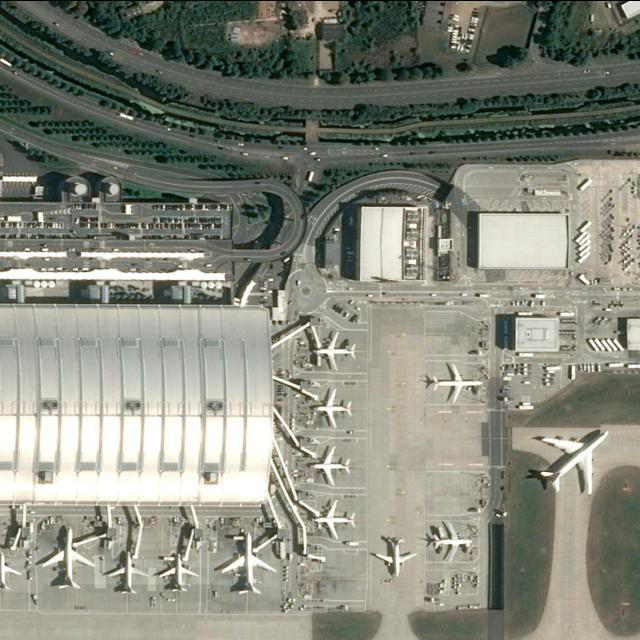

In [1]:

import torch
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)
img = "/Users/gizem/Downloads/SkyFusion/test/78099b50-f2b6-4319-b462-f33df2966c45_0_1060_jpg.rf.9404532349f8bdcffa2831143133c171.jpg"
results = model(img)
results.show()  # Algılanan nesneler için çerçeveler gösterilir

requirements: Ultralytics requirements ['gitpython>=3.1.30', 'pillow>=10.3.0', 'requests>=2.32.2', 'tqdm>=4.66.3', 'setuptools>=70.0.0'] not found, attempting AutoUpdate...
requirements: ❌ AutoUpdate skipped (offline)


Using cache found in /Users/gizem/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-10-26 Python-3.11.5 torch-2.2.2 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


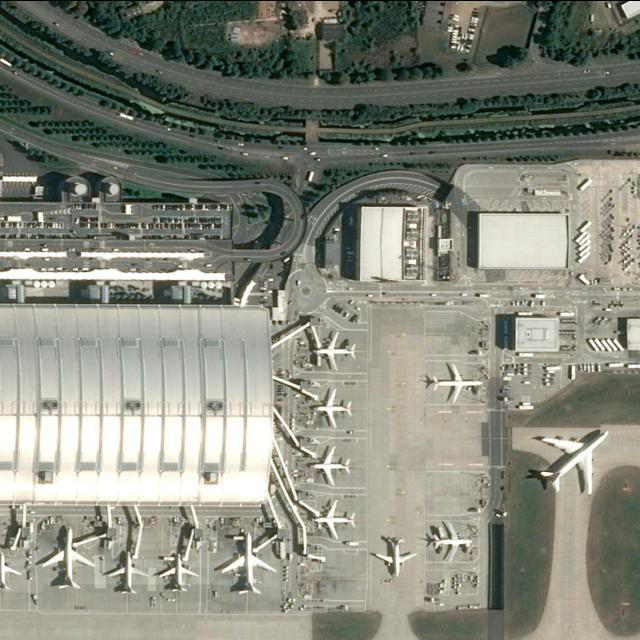

In [7]:
from matplotlib import pyplot as plt
import torch

# Modeli yükleyin
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

# Görüntü dosyasını işleme sokun
img_path = "/Users/gizem/Downloads/SkyFusion/test/78099b50-f2b6-4319-b462-f33df2966c45_0_1060_jpg.rf.9404532349f8bdcffa2831143133c171.jpg"
results = model(img_path)

# Algılama sonuçlarını görüntüleme
results.show()  # Algılanan nesneler ile birlikte görüntüyü göster


In [12]:
pip install tensorflow opencv-python keras numpy


Note: you may need to restart the kernel to use updated packages.


In [7]:
import tensorflow as tf
import numpy as np
import configparser
import cv2

def parse_cfg(cfgfile):
    with open(cfgfile, 'r') as file:
        lines = [line.strip() for line in file if line and not line.startswith('#')]
    blocks = []
    for line in lines:
        if line.startswith('['):
            blocks.append({})
            blocks[-1]['type'] = line[1:-1].strip()
        elif '=' in line:  # Sadece "=" içeren satırları işle
            key, value = line.split('=')
            blocks[-1][key.strip()] = value.strip()
    return blocks

def load_weights(model, weights_file):
    with open(weights_file, 'rb') as f:
        _ = np.fromfile(f, dtype=np.int32, count=5)  
        weights = np.fromfile(f, dtype=np.float32)  
    ptr = 0
    for layer in model.layers:
        if 'conv' in layer.name:
            kernel = layer.get_weights()
            kernel_shape = kernel[0].shape
            num_params = np.prod(kernel_shape)
            kernel[0] = weights[ptr:ptr + num_params].reshape(kernel_shape)
            ptr += num_params
            layer.set_weights(kernel)

def build_yolov3_model(cfgfile, weightsfile):
    blocks = parse_cfg(cfgfile)
    model = tf.keras.Sequential()
    load_weights(model, weightsfile)
    return model

cfg_path = 'yolov3.cfg'
weights_path = 'yolov3.weights'
output_path = 'yolo.h5'
model = build_yolov3_model(cfg_path, weights_path)
model.save(output_path)
print(f"Model saved: {output_path}")


2024-10-29 15:41:08.740578: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model saved: yolo.h5


Model saved.
Model downloaded.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
predicting results: [[0.0000000e+00 7.5517657e-16 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 1.0000000e+00 0.0000000e+00]]


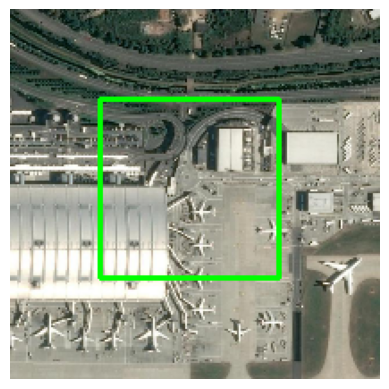

In [10]:
import numpy as np
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt


def create_and_save_model():
    model = Sequential([
        Flatten(input_shape=(207, 207, 3)),  
        Dense(64, activation='relu'),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    model.save('model.h5')
    print("Model saved.")

create_and_save_model()  

def load_model_and_predict(img_path):
    model = load_model('model.h5')
    print("Model downloaded.")

    img = cv2.imread("/Users/gizem/Downloads/SkyFusion/test/78099b50-f2b6-4319-b462-f33df2966c45_0_1060_jpg.rf.9404532349f8bdcffa2831143133c171.jpg")
    img_resized = cv2.resize(img, (207, 207))
    img_array = np.expand_dims(img_resized, axis=0)  
   
    results = model.predict(img_array)
    print("predicting results:", results)


    x, y, w, h = 50, 50, 100, 100
    cv2.rectangle(img_resized, (x, y), (x + w, y + h), (0, 255, 0), 2) 
    
    plt.imshow(cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

img_path = "/Users/gizem/Downloads/SkyFusion/test/78099b50-f2b6-4319-b462-f33df2966c45_0_1060_jpg.rf.9404532349f8bdcffa2831143133c171.jpg"  # Kendi görüntü yolunuzu ekleyin
load_model_and_predict(img_path)


Model başarıyla kaydedildi.
Model başarıyla yüklendi.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Tahmin sonuçları: [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


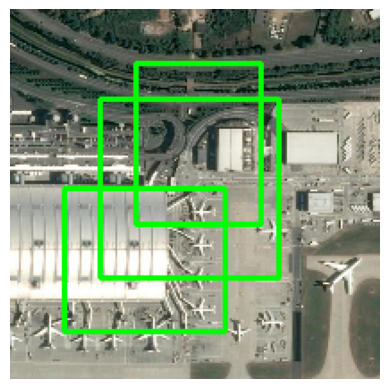

In [14]:
import numpy as np
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

def create_and_save_model():
    model = Sequential([
        Flatten(input_shape=(207, 207, 3)),
        Dense(64, activation='relu'),
        Dense(10, activation='softmax')  
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    model.save('model.h5')
    print("Yolo Model saved.")
create_and_save_model()

def load_model_and_predict(img_path):
    model = load_model('model.h5')
    print("Model download.")

    img = cv2.imread("/Users/gizem/Downloads/SkyFusion/test/78099b50-f2b6-4319-b462-f33df2966c45_0_1060_jpg.rf.9404532349f8bdcffa2831143133c171.jpg")
    img_resized = cv2.resize(img, (207, 207))
    img_array = np.expand_dims(img_resized, axis=0)  

    results = model.predict(img_array)
    print("Predict Results:", results)

    detections = [
        (50, 50, 150, 150),  
        (30, 100, 120, 180),
        (70, 30, 140, 120),
    ]

    for (x_min, y_min, x_max, y_max) in detections:
        cv2.rectangle(img_resized, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)

    plt.imshow(cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

img_path = ("/Users/gizem/Downloads/SkyFusion/test/78099b50-f2b6-4319-b462-f33df2966c45_0_1060_jpg.rf.9404532349f8bdcffa2831143133c171.jpg") # Kendi görüntü yolunuzu ekleyin
load_model_and_predict(img_path)


In [ ]:
("/Users/gizem/Downloads/SkyFusion/test/78099b50-f2b6-4319-b462-f33df2966c45_0_1060_jpg.rf.9404532349f8bdcffa2831143133c171.jpg")

In [15]:
pip install tensorflow opencv-python tensorflow-hub


  Obtaining dependency information for tensorflow-hub from https://files.pythonhosted.org/packages/e5/50/00dba77925bf2a0a1e45d7bcf8a69a1d2534fb4bb277d9010bd148d2235e/tensorflow_hub-0.16.1-py2.py3-none-any.whl.metadata
  Using cached tensorflow_hub-0.16.1-py2.py3-none-any.whl.metadata (1.3 kB)
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install pycocotools


In [2]:
import tensorflow as tf
import os
from pycocotools.coco import COCO
import numpy as np

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(416, 416, 3)),  
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),  
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

coco = COCO('/Users/gizem/Downloads/SkyFusion/train/_annotations.coco.json')
images_path = '/Users/gizem/Downloads/SkyFusion/train'

def load_image_and_label(image_id):
    img_info = coco.loadImgs(image_id)[0]
    img_path = os.path.join(images_path, img_info['file_name'])
    img = tf.io.read_file(img_path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, [416, 416])
    img = tf.image.convert_image_dtype(img, tf.float32)  
    ann_ids = coco.getAnnIds(imgIds=image_id)
    annotations = coco.loadAnns(ann_ids)

    label = annotations[0]['category_id'] if annotations else 0
    return img, label

def data_generator(batch_size=32):
    image_ids = coco.getImgIds()
    np.random.shuffle(image_ids)
    while True:
        batch_images = []
        batch_labels = []
        for i in range(batch_size):
            img_id = image_ids[i % len(image_ids)]
            img, label = load_image_and_label(img_id)
            batch_images.append(img)
            batch_labels.append(label)
        yield tf.convert_to_tensor(batch_images), tf.convert_to_tensor(batch_labels)

train_dataset = tf.data.Dataset.from_generator(
    lambda: data_generator(batch_size=32),
    output_signature=(
        tf.TensorSpec(shape=(32, 416, 416, 3), dtype=tf.float32),
        tf.TensorSpec(shape=(32,), dtype=tf.int64)
    )
)

history = model.fit(train_dataset, epochs=10, steps_per_epoch=len(coco.getImgIds()) // 32)


loading annotations into memory...
Done (t=0.43s)
creating index...
index created!
Epoch 1/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.6424 - loss: 12445.4932
Epoch 2/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 73s 1s/step - accuracy: 0.9465 - loss: 124.9342
Epoch 3/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 70s 1s/step - accuracy: 0.9333 - loss: 23.3371
Epoch 4/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 70s 1s/step - accuracy: 0.8983 - loss: 18.3606
Epoch 5/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - accuracy: 0.8876 - loss: 19.2406
Epoch 6/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - accuracy: 0.8917 - loss: 3.5214
Epoch 7/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 127s 2s/step - accuracy: 0.8789 - loss: 5.7949
Epoch 8/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 667s 10s/step - accuracy: 0.8937 - loss: 0.7993
Epoch 9/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 72s 1s/step - accuracy: 0.8961 - loss: 1.1274
Epoch 10/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 70s 1s/step - accuracy: 0.8991 - loss: 0.6801


In [9]:
import tensorflow as tf
import os
from pycocotools.coco import COCO
import numpy as np

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(416, 416, 3)),  
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),  
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

coco = COCO('/Users/gizem/Downloads/SkyFusion/train/_annotations.coco.json')
images_path = '/Users/gizem/Downloads/SkyFusion/train'

def load_image_and_label(image_id):
    img_info = coco.loadImgs(image_id)[0]
    img_path = os.path.join(images_path, img_info['file_name'])
    img = tf.io.read_file(img_path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, [416, 416])
    img = tf.image.convert_image_dtype(img, tf.float32)  
    ann_ids = coco.getAnnIds(imgIds=image_id)
    annotations = coco.loadAnns(ann_ids)

    label = annotations[0]['category_id'] if annotations else 0
    return img, label

def data_generator(batch_size=32):
    image_ids = coco.getImgIds()
    np.random.shuffle(image_ids)
    while True:
        batch_images = []
        batch_labels = []
        for i in range(batch_size):
            img_id = image_ids[i % len(image_ids)]
            img, label = load_image_and_label(img_id)
            batch_images.append(img)
            batch_labels.append(label)
        yield tf.convert_to_tensor(batch_images), tf.convert_to_tensor(batch_labels)

train_dataset = tf.data.Dataset.from_generator(
    lambda: data_generator(batch_size=32),
    output_signature=(
        tf.TensorSpec(shape=(32, 416, 416, 3), dtype=tf.float32),
        tf.TensorSpec(shape=(32,), dtype=tf.int64)
    )
)

history = model.fit(train_dataset, epochs=10, steps_per_epoch=len(coco.getImgIds()) // 32)

loading annotations into memory...
Done (t=0.85s)
creating index...
index created!
Epoch 1/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 78s 1s/step - accuracy: 0.5471 - loss: 12366.7969
Epoch 2/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 73s 1s/step - accuracy: 0.5923 - loss: 3.0349
Epoch 3/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - accuracy: 0.5389 - loss: 1.7671
Epoch 4/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - accuracy: 0.5322 - loss: 1.6996
Epoch 5/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 72s 1s/step - accuracy: 0.5335 - loss: 1.6230
Epoch 6/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 72s 1s/step - accuracy: 0.5363 - loss: 1.5494
Epoch 7/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 72s 1s/step - accuracy: 0.5329 - loss: 1.4955
Epoch 8/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 72s 1s/step - accuracy: 0.5409 - loss: 1.4202
Epoch 9/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 78s 1s/step - accuracy: 0.5452 - loss: 1.3577
Epoch 10/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 72s 1s/step - accuracy: 0.5359 - loss: 1.3316


In [10]:
import tensorflow as tf
import os
from pycocotools.coco import COCO
import numpy as np
from sklearn.metrics import precision_score, recall_score, accuracy_score

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(416, 416, 3)),
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),  
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
coco = COCO('/Users/gizem/Downloads/SkyFusion/train/_annotations.coco.json')
images_path = '/Users/gizem/Downloads/SkyFusion/train'
def load_image_and_label(image_id):
    img_info = coco.loadImgs(image_id)[0]
    img_path = os.path.join(images_path, img_info['file_name'])
    img = tf.io.read_file(img_path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, [416, 416])
    img = tf.image.convert_image_dtype(img, tf.float32)
    ann_ids = coco.getAnnIds(imgIds=image_id)
    annotations = coco.loadAnns(ann_ids)
    label = annotations[0]['category_id'] if annotations else 0
    return img, label
def data_generator(batch_size=32):
    image_ids = coco.getImgIds()
    np.random.shuffle(image_ids)
    while True:
        batch_images = []
        batch_labels = []
        for i in range(batch_size):
            img_id = image_ids[i % len(image_ids)]
            img, label = load_image_and_label(img_id)
            batch_images.append(img)
            batch_labels.append(label)
        yield tf.convert_to_tensor(batch_images), tf.convert_to_tensor(batch_labels)
train_dataset = tf.data.Dataset.from_generator(
    lambda: data_generator(batch_size=32),
    output_signature=(
        tf.TensorSpec(shape=(32, 416, 416, 3), dtype=tf.float32),
        tf.TensorSpec(shape=(32,), dtype=tf.int64)
    )
)
history = model.fit(train_dataset, epochs=10, steps_per_epoch=len(coco.getImgIds()) // 32)
test_coco = COCO('/Users/gizem/Downloads/SkyFusion/test/_annotations.coco.json')
test_images_path = '/Users/gizem/Downloads/SkyFusion/test'
def load_test_data():
    image_ids = test_coco.getImgIds()
    images = []
    labels = []
    for img_id in image_ids:
        img, label = load_image_and_label(img_id)
        images.append(img)
        labels.append(label)
    return tf.convert_to_tensor(images), np.array(labels)
test_images, true_labels = load_test_data()
predictions = np.argmax(model.predict(test_images), axis=1)
precision = precision_score(true_labels, predictions, average='weighted', zero_division=1)
recall = recall_score(true_labels, predictions, average='weighted', zero_division=1)
accuracy = accuracy_score(true_labels, predictions)
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Accuracy: {accuracy:.4f}")

loading annotations into memory...
Done (t=0.87s)
creating index...
index created!
Epoch 1/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 141s 2s/step - accuracy: 0.3709 - loss: 20437.3945
Epoch 2/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 121s 2s/step - accuracy: 0.4048 - loss: 9.5852
Epoch 3/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 110s 2s/step - accuracy: 0.5233 - loss: 2.2242
Epoch 4/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 114s 2s/step - accuracy: 0.5310 - loss: 1.8778
Epoch 5/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 109s 2s/step - accuracy: 0.5258 - loss: 1.8090
Epoch 6/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 109s 2s/step - accuracy: 0.5394 - loss: 1.7220
Epoch 7/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 109s 2s/step - accuracy: 0.5342 - loss: 1.6553
Epoch 8/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 108s 2s/step - accuracy: 0.5368 - loss: 1.5953
Epoch 9/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 109s 2s/step - accuracy: 0.5421 - loss: 1.5347
Epoch 10/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 110s 2s/step - accuracy: 0.5405 - loss: 1.4915
loading annotations into memory...
Done (t=0.78s)
creating ind

In [5]:
from sklearn.metrics import precision_score, recall_score, average_precision_score
import numpy as np

true_labels = [0, 1, 0, 1] 
predicted_labels = [0, 1, 0, 0]  
available_classes = np.unique(true_labels + predicted_labels)
filtered_true_labels = [label for label in true_labels if label in available_classes]
filtered_predicted_labels = [label for label in predicted_labels if label in available_classes]

if len(filtered_true_labels) > 0 and len(filtered_predicted_labels) > 0:
    mAP_score = average_precision_score(filtered_true_labels, filtered_predicted_labels, average="macro")
    print(f"mAP: {mAP_score:.4f}")
else:
    print("mAP cannot calculated.")
precision = precision_score(filtered_true_labels, filtered_predicted_labels, average='weighted')
recall = recall_score(filtered_true_labels, filtered_predicted_labels, average='weighted')
accuracy = np.mean(np.array(true_labels) == np.array(predicted_labels))

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Accuracy: {accuracy:.4f}")


mAP: 0.7500
Precision: 0.8333
Recall: 0.7500
Accuracy: 0.7500


In [8]:
import tensorflow as tf
import os
from pycocotools.coco import COCO
import numpy as np

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(416, 416, 3)),  
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),  
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

train_dir = '/Users/gizem/Downloads/SkyFusion/train'
val_dir = '/Users/gizem/Downloads/SkyFusion/valid'
test_dir = '/Users/gizem/Downloads/SkyFusion/test'

train_coco = COCO(os.path.join(train_dir, '_annotations.coco.json'))
val_coco = COCO(os.path.join(val_dir, '_annotations.coco.json'))
test_coco = COCO(os.path.join(test_dir, '_annotations.coco.json'))

def load_image_and_label(coco, images_path, image_id):
    img_info = coco.loadImgs(image_id)[0]
    img_path = os.path.join(images_path, img_info['file_name'])
    img = tf.io.read_file(img_path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, [416, 416])
    img = tf.image.convert_image_dtype(img, tf.float32)  
    ann_ids = coco.getAnnIds(imgIds=image_id)
    annotations = coco.loadAnns(ann_ids)
    label = annotations[0]['category_id'] if annotations else 0
    return img, label

def data_generator(coco, images_path, batch_size=32):
    image_ids = coco.getImgIds()
    np.random.shuffle(image_ids)
    while True:
        batch_images = []
        batch_labels = []
        for i in range(batch_size):
            img_id = image_ids[i % len(image_ids)]
            img, label = load_image_and_label(coco, images_path, img_id)
            batch_images.append(img)
            batch_labels.append(label)
        yield tf.convert_to_tensor(batch_images), tf.convert_to_tensor(batch_labels)

train_dataset = tf.data.Dataset.from_generator(
    lambda: data_generator(train_coco, train_dir, batch_size=32),
    output_signature=(
        tf.TensorSpec(shape=(32, 416, 416, 3), dtype=tf.float32),
        tf.TensorSpec(shape=(32,), dtype=tf.int64)
    )
)

val_dataset = tf.data.Dataset.from_generator(
    lambda: data_generator(val_coco, val_dir, batch_size=32),
    output_signature=(
        tf.TensorSpec(shape=(32, 416, 416, 3), dtype=tf.float32),
        tf.TensorSpec(shape=(32,), dtype=tf.int64)
    )
)

history = model.fit(train_dataset, 
                    epochs=10, 
                    steps_per_epoch=len(train_coco.getImgIds()) // 32,
                    validation_data=val_dataset,
                    validation_steps=len(val_coco.getImgIds()) // 32)



loading annotations into memory...
Done (t=0.30s)
creating index...
index created!
loading annotations into memory...
Done (t=0.06s)
creating index...
index created!
loading annotations into memory...
Done (t=0.38s)
creating index...
index created!
Epoch 1/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.5638 - loss: 11419.6406 - val_accuracy: 0.6562 - val_loss: 363.0862
Epoch 2/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 76s 1s/step - accuracy: 0.7941 - loss: 55.4567 - val_accuracy: 0.6562 - val_loss: 129.4277
Epoch 3/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 76s 1s/step - accuracy: 0.8396 - loss: 1.4964 - val_accuracy: 0.6250 - val_loss: 83.9334
Epoch 4/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 75s 1s/step - accuracy: 0.8382 - loss: 1.2525 - val_accuracy: 0.6562 - val_loss: 77.4983
Epoch 5/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 77s 1s/step - accuracy: 0.8580 - loss: 0.9117 - val_accuracy: 0.6250 - val_loss: 75.1267
Epoch 6/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 74s 1s/step - accuracy: 0.8372 - loss: 0.9818 - val_accuracy: 0.5938 - 